# OpenCV를 활용한 기본 영상처리를 위한 코드 예시
@2020-06-09/@pletalk

## [0] OpenCV 설치 확인하기

In [155]:
!pip list | grep opencv

opencv-contrib-python    4.1.2.30       
opencv-python            4.1.2.30       


## [1] 라이브러리 로딩하기

In [0]:
import cv2
import os
import numpy as np

In [0]:
# 여러줄에 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## [2] 샘플 데이타(이미지/영상) 다운로드 받기

### 1> 이미지 다운로드 받기

In [158]:
!wget -O sample_image.jpg https://images.unsplash.com/photo-1490750967868-88aa4486c946?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80

--2020-06-10 13:52:00--  https://images.unsplash.com/photo-1490750967868-88aa4486c946?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.202.208, 2a04:4e42:50::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.202.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26784788 (26M) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  25.54M  44.3MB/s    in 0.6s    

2020-06-10 13:52:01 (44.3 MB/s) - ‘sample_image.jpg’ saved [26784788/26784788]



### 2> 영상 다운로드 받기

In [159]:
!wget https://github.com/dctian/DeepPiCar/blob/master/models/lane_navigation/data/images/video01.avi

--2020-06-10 13:52:03--  https://github.com/dctian/DeepPiCar/blob/master/models/lane_navigation/data/images/video01.avi
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘video01.avi.1’

video01.avi.1           [ <=>                ]  66.80K  --.-KB/s    in 0.03s   

2020-06-10 13:52:03 (2.42 MB/s) - ‘video01.avi.1’ saved [68402]



## [3] OpenCV를 사용해서 이미지 읽기

### 1> 이미지 파일에서 로딩하기

In [0]:
import cv2
import matplotlib.pyplot as plt

image_data_file = '/content/sample_image.jpg'
image = cv2.imread(image_data_file)

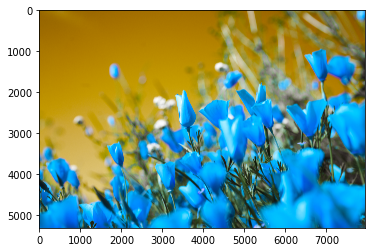

In [161]:
plt.imshow(image)
plt.show()

### 2> 이미지 포맷 변경하기 (BGR -> RGB)

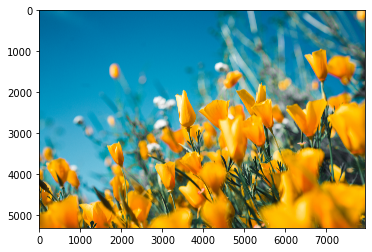

In [162]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

### 3> 이미지 크기

In [163]:
image_rgb.shape

(5304, 7952, 3)

### 4> 흑백이미지로 바꾸기

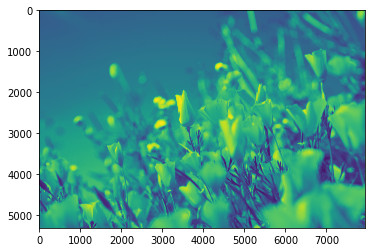

In [164]:
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray)
plt.show()

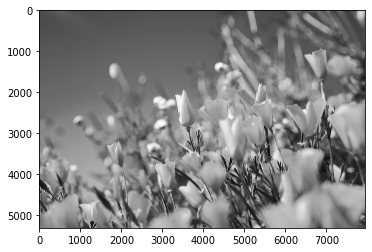

In [165]:
plt.imshow(image_gray,cmap='gray')
plt.show()

In [166]:
image_gray.shape

(5304, 7952)

## [4] 동영상 처리하기

In [0]:
%rm -rf /content/DeepPiCar

In [168]:
!git clone https://github.com/dctian/DeepPiCar.git

Cloning into 'DeepPiCar'...
remote: Enumerating objects: 1027, done.
remote: Total 1027 (delta 0), reused 0 (delta 0), pack-reused 1027
Receiving objects: 100% (1027/1027), 141.14 MiB | 30.63 MiB/s, done.
Resolving deltas: 100% (320/320), done.


### 1> 동영상 파일 읽기

In [0]:
video_file_name = '/content/DeepPiCar/models/lane_navigation/data/images/video01.avi'
cap = cv2.VideoCapture(video_file_name)

In [0]:
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) 
vid_fps = cap.get(cv2.CAP_PROP_FPS )

In [171]:
print("video_size=",vid_size)
print("vid_fps(frame per second)=",vid_fps)

video_size= (320, 240)
vid_fps(frame per second)= 20.0


### 2> 동영상을 이미지단위로 나누어 저정하기

In [172]:
%mkdir /content/frames

mkdir: cannot create directory ‘/content/frames’: File exists


In [173]:
%pwd

'/content'

In [174]:
video_file_name = '/content/DeepPiCar/models/lane_navigation/data/images/video01.avi'
cap = cv2.VideoCapture(video_file_name)

frames_dir = '/content/frames'  #영상 내 프레임이미지가 저장될 디렉토리
seq_no = 0  # 시작 순차번호

while cap.isOpened():
    ret, frame = cap.read()
    
    # ret값이 True이면, 읽을 데이타가 있다는 의미
    if not ret:
        print("더 이상 읽을 프레임이 없습니다. 종료합니다 ...")
        break
    
    # 프레임으로 저장할 파일명 생성 (이미지 파일의 확장자는 png)
    save_file_name = "%s_%03d.png"%("video01",seq_no)
    seq_no += 1
    save_frame_file_path = os.path.join(frames_dir,save_file_name)
    _ = cv2.imwrite(save_frame_file_path,frame)

cap.release()

더 이상 읽을 프레임이 없습니다. 종료합니다 ...


### 3> 여러 이미지들을 하나의 동영상으로 합하기

In [175]:
# 입력으로 사용할 프레임들이 들어있는 디렉토리 지정
input_frames_dir = '/content/frames'

# 이미지 프레임들을 합해서 만들 영상의 저장 파일명(경로)
video_output_path = '/content/video_by_merging_frames.avi'

# 병합할 이미지들 파일명 가져오기
sorted_filename_list = np.sort(os.listdir(input_frames_dir))
print("총 frame의 갯수 = ",len(sorted_filename_list))

총 frame의 갯수 =  222


In [176]:
frame_file_name = os.path.join(input_frames_dir,sorted_filename_list[0])
tmp_image = cv2.imread(frame_file_name)

# 이미지의 높이를 영상의 높이로 설정
frame_height=tmp_image.shape[0]
# 이미지의 넓이를 영상의 넓이로 설정
frame_width =tmp_image.shape[1]

print("frame_height=",frame_height)
print("frame_width=",frame_width)

frame_height= 240
frame_width= 320


In [177]:
# 출력할 영상의 Codec을 *'XVID'로 설정하기
fourcc = cv2.VideoWriter_fourcc(*'XVID')
vid_size = (frame_width, frame_height)
vid_fps = 20 # 초당 20프레임으로 설정

print("video_size=",vid_size)
print("vid_fps(frame per second)=",vid_fps)

# 저장할 .avi의 파일을 설정
vid_writer = cv2.VideoWriter(video_output_path, fourcc, vid_fps, vid_size) 

# 병합할 프레임 이미지를 읽어서 영상파일에 저장
for i in range(len(sorted_filename_list)):
    frame_file_name = os.path.join(input_frames_dir,sorted_filename_list[i])
    frame_image = cv2.imread(frame_file_name)
    vid_writer.write(frame_image)
    
vid_writer.release()


video_size= (320, 240)
vid_fps(frame per second)= 20


## [5] 이미지의 잡음 제거하기 (Gaussian filter)

In [0]:
# remove noise
blur_gray_image = cv2.GaussianBlur(image_gray,(3,3),0)

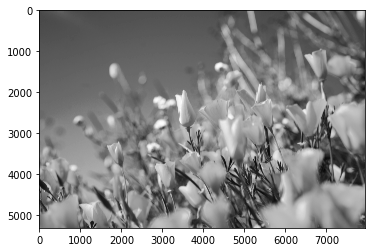

In [179]:
_ = plt.imshow(blur_gray_image,cmap='gray')

## [6] Canny 필터링

In [0]:
# Using the Canny filter to get contours
blur_gray_image = cv2.GaussianBlur(image_gray,(5,5),0)
edges = cv2.Canny(blur_gray_image, 20, 30)

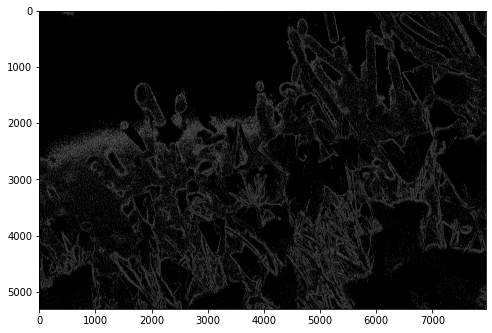

In [181]:
_ = plt.figure(figsize=(8,6))
_ = plt.imshow(edges,cmap='gray')

## [7] 히스토그램

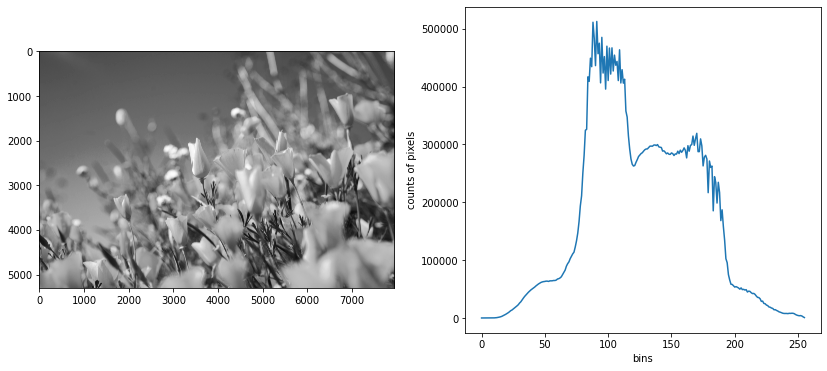

In [182]:
hist = cv2.calcHist([image_gray],[0],None,[256],[0,256])

_ = plt.figure(figsize=(14,6))
_ = plt.subplot(1,2,1)
_ = plt.imshow(image_gray,cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.xlabel("bins")
_ = plt.ylabel("counts of pixels")
_ = plt.plot(hist)

## [8] 이미지 크기 변환하기

> 들여쓴 블록




In [0]:
# 높이와 넓이를 60%로 스케일 다운 

width = int(image_gray.shape[1] * 0.6)
height = int(image_gray.shape[0] * 0.6)

resized_gray_image = cv2.resize(image_gray, (width, height), interpolation = cv2.INTER_AREA)

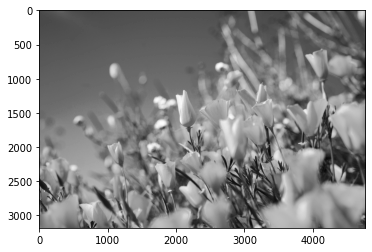

In [184]:
_ = plt.imshow(resized_gray_image,cmap='gray')

In [185]:
print("원래 흑백이미지의 크기(height,width) = ",image_gray.shape)
print("크기변환 흑백미이지의 크기(height,width) = ",resized_gray_image.shape)

원래 흑백이미지의 크기(height,width) =  (5304, 7952)
크기변환 흑백미이지의 크기(height,width) =  (3182, 4771)


## [9] 이미지 뒤집기

In [0]:
# x축을 기준으로 뒤집기
flipped_byx_gray_image = cv2.flip(image_gray,0)

# y축을 기준으로 뒤집기 
flipped_byy_gray_image = cv2.flip(image_gray,1)

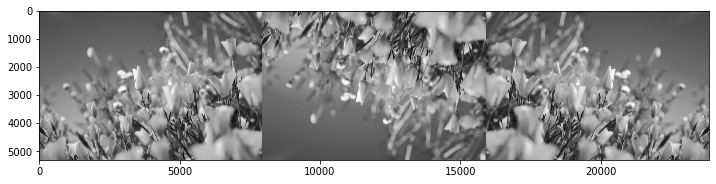

In [187]:
# 이미지 병합하기
images = np.hstack((image_gray, flipped_byx_gray_image, flipped_byy_gray_image))

_ = plt.figure(figsize=(12,8))
_ = plt.imshow(images,cmap='gray')

## [10] 이미지 이진화하기

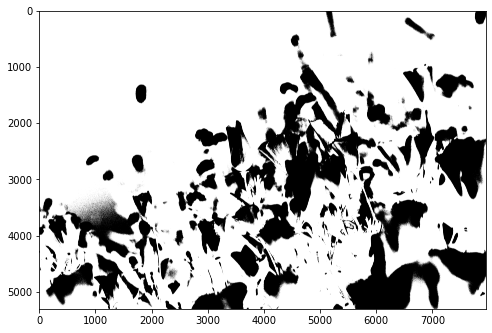

In [188]:
threshed_image = cv2.threshold(image_gray, 160,255, cv2.THRESH_BINARY_INV)[1]
_ = plt.figure(figsize=(8,6))
_ = plt.imshow(threshed_image,cmap='gray')

## [11] 허프변환을 활용한 직선찾기

### 1> 허프변환을 위한 샘플 이미지 다운로드하기(수도쿠)

In [189]:
!wget -O hough_sample.jpg http://web.archive.org/web/20140601100441if_/http://davemark.com/images/sudoku.jpg

--2020-06-10 13:52:52--  http://web.archive.org/web/20140601100441if_/http://davemark.com/images/sudoku.jpg
Resolving web.archive.org (web.archive.org)... 207.241.233.214
Connecting to web.archive.org (web.archive.org)|207.241.233.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘hough_sample.jpg’

hough_sample.jpg        [ <=>                ]  45.59K  --.-KB/s    in 0.1s    

2020-06-10 13:53:06 (320 KB/s) - ‘hough_sample.jpg’ saved [46689]



### 2> 이미지 로딩 및 edge 탐지하기

In [0]:
img = cv2.imread('./hough_sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [0]:
# 이미지의 edge 탐지(Canny)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

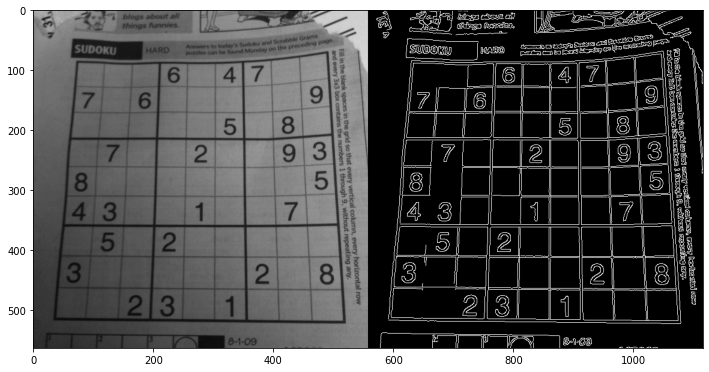

In [192]:
images = np.hstack((gray, edges))
_ = plt.figure(figsize=(12,8))
_ = plt.imshow(images,cmap='gray')

### 3> 허프변환 수행하기

In [0]:
# edge가 탐지된 이미지에서 라인들을 선택
lines = cv2.HoughLines(edges,1,np.pi/180,200)
final_image = img.copy()

# 탐지된 라인을 그리기 (Blue라인)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    _ = cv2.line(final_image,(x1,y1),(x2,y2),(255,0,0),2) # red line

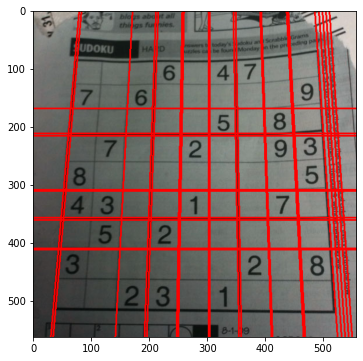

In [194]:
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_image)

### 4> 확률적 허프 변환수행하기

In [0]:
# 두개의 파라미터들을 설정합니다 
minLineLength = 100   #최소 라인길이 (이 길이보다 작으면 배제)
maxLineGap = 10      #최대 라인갭 (하나의 라인으로 묶기 위한 라인간의 거리)

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

In [0]:
prob_final_image = img.copy()

for line in lines:
    x1,y1,x2,y2 = line[0]
    
    _ = cv2.line(prob_final_image,(x1,y1),(x2,y2),(0,255,0),2)

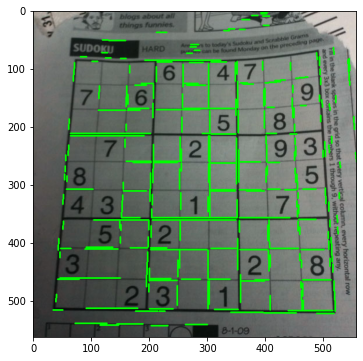

In [197]:
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(prob_final_image)

## [12] 이미지 마스킹(masking) 하기

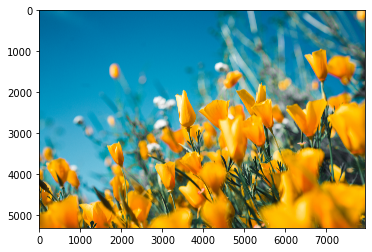

In [198]:
_ = plt.imshow(image_rgb)

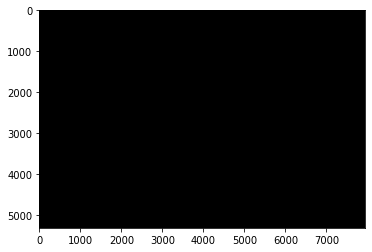

In [199]:
### 1> 이미지 크기와 동일한 mask만들기 

mask_image = np.zeros_like(image_rgb)
plt.imshow(mask_image)

### 2> 마스크 이미지에서 보여질 영역 지정하기

In [200]:
mask_image.shape

(5304, 7952, 3)

In [0]:
# 원을 그릴 공간의 중심 포인트를 찾습니다
width=round(mask_image.shape[1]/2)
height=round(mask_image.shape[0]/2)
center_coordinates = (width,height)
  
# Radius of circle 
radius = 2000
   
# white color in BGR 
color = (255, 255, 255) 
   
# Line thickness of -1 px 
thickness = -1
   
mask_image2 = cv2.circle(mask_image, 
                        center_coordinates, 
                        radius, 
                        color, 
                        thickness) 

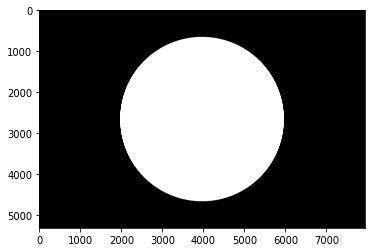

In [202]:
_ = plt.imshow(mask_image2)

### 3> 원래 이미지와 합하기

* <참고> https://copycoding.tistory.com/156

In [0]:
# bit연산을 수행 (bit_and)

final_composite_image = cv2.bitwise_and(image_rgb, mask_image2)

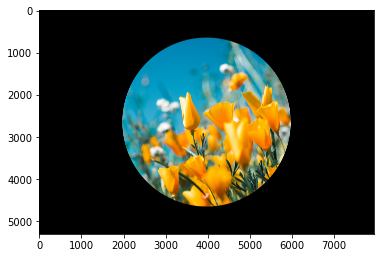

In [213]:
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image)

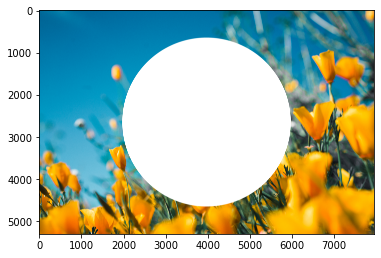

In [214]:
# bit연산을 수행 (bit_or)

final_composite_image = cv2.bitwise_or(image_rgb, mask_image2)
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image)

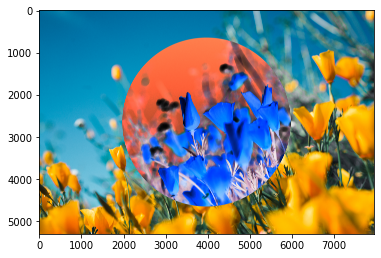

In [215]:
# bit연산을 수행 (bit_xor)

final_composite_image = cv2.bitwise_xor(image_rgb,mask_image2)
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image)

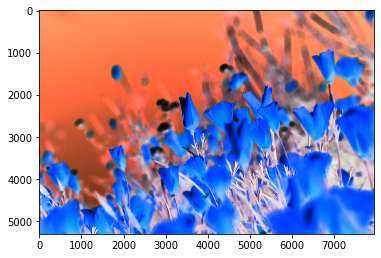

In [216]:
# bit연산을 수행 (bit_not)

final_composite_image = cv2.bitwise_not(image_rgb,mask_image2)
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image)